In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings  

In [3]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
sale_price = data["Sale_Price"].head(30)
flat_area = data["Flat Area (in Sqft)"].head(30)
sampledata = pd.DataFrame({"sale_price": sale_price, "flat_area": flat_area}) # we create a new dataframe with these 30 rows and flat area and sale price as data
sampledata

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


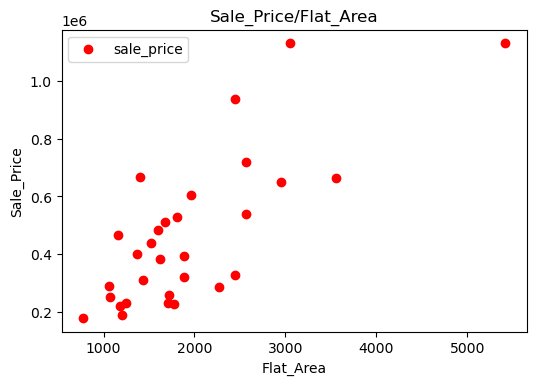

In [5]:
plt.figure( dpi = 100)
plt.scatter(sampledata.flat_area, sampledata.sale_price, color = 'red', label = 'sale_price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/Flat_Area")
plt.legend()
plt.show()
#from the below graph we can roughly figure out a straight line which potrays the relationship b/w sale price and flat area.

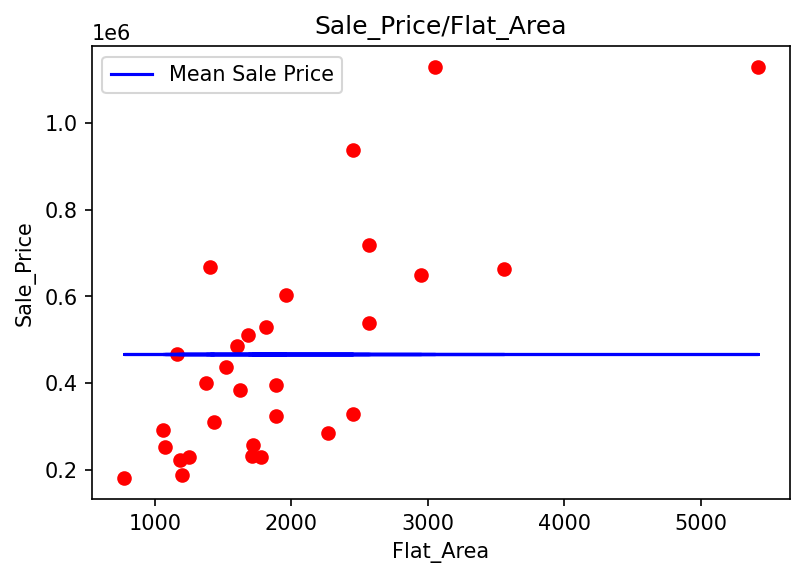

In [6]:
sampledata['mean_sale_price'] = sampledata.sale_price.mean()
#new column where mean of the sale price is calculated

plt.figure( dpi = 150)
plt.scatter(sampledata.flat_area, sampledata.sale_price, color = 'red')
plt.plot(sampledata.flat_area, sampledata.mean_sale_price, color = "blue", label = 'Mean Sale Price')
# plotting the line for mean of the sale price 
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/Flat_Area")
plt.legend()
plt.show()

Now you can see that according to this simple mean model, flat area of 2000 and 5000 sqft will be sold for the same price, which is obviously not possible. 

We know that sale price and flat are are corellated and with the help of that we can generalise and draw a line (slanted line) [check physical notes]. Here sale price for 2000 and 5000 sqft is different. Therefore this regression/model is more accurate than the simple mean model
(even though that model may be like 2% accurate but a simple mean model is ALWAYS 0% accurate in 99.999% of cases)

<h3>how to know how accurate is the model?</h3>

model is nothing but a line btw
eqn of line => y = mx+c (x = independant var, y = dependant var (as in the value of y depends on x, look at the eqn), c = y intercept)

take 3 lines with 3 diff values of c but m is same,
the rate at which y changes wrt x is the same

but when m is diff and c is the same,
the rate at which y changes wrt x is diff

Text(0.5, 1.0, 'slope 0 with mse 281372081125.0')

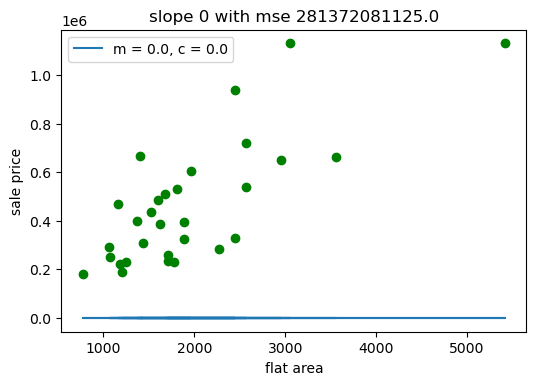

In [7]:
from sklearn.metrics import mean_squared_error
c = 0
m = 0
line = []
for i in range (len(sampledata)):
    line.append(sampledata.flat_area[i]*m +c)

plt.figure(dpi = 100)
plt.scatter(sampledata.flat_area, sampledata.sale_price, color = "green")
plt.plot(sampledata.flat_area, line, label = "m = 0.0, c = 0.0")
plt.xlabel('flat area')
plt.ylabel('sale price')
plt.legend()
MSE = mean_squared_error(sampledata.sale_price, line)
plt.title("slope "+str(m)+" with mse "+ str(MSE))

as you can see here the line models the data very poorly and the mse is very very large

Text(0.5, 1.0, 'slope 75 with mse 145064012062.5')

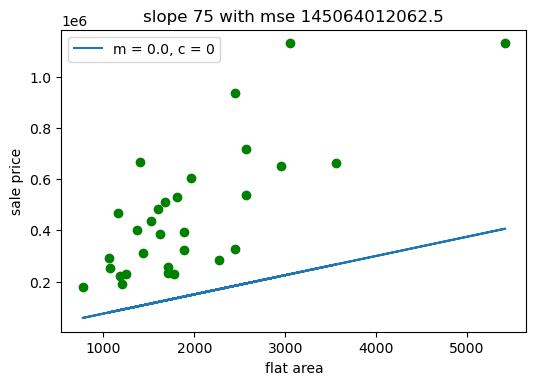

In [8]:
from sklearn.metrics import mean_squared_error
c = 0
m = 75
line = []
for i in range (len(sampledata)):
    line.append(sampledata.flat_area[i]*m +c)

plt.figure(dpi = 100)
plt.scatter(sampledata.flat_area, sampledata.sale_price, color = "green")
plt.plot(sampledata.flat_area, line, label = "m = 0.0, c = 0")
plt.xlabel('flat area')
plt.ylabel('sale price')
plt.legend()
MSE = mean_squared_error(sampledata.sale_price, line)
plt.title("slope "+str(m)+" with mse "+ str(MSE))

again this model is better but we do know that there may be better models that this so we would have to do this step repeatedly to achieve the best one.

In [9]:
def slope_error(slope, intercept, sampledata):
    sale = [] # we will store the points predicted by the line with slope m
    # for every pt in the sampledata.flat_area, we calculate the predicted point and store it in the list sale.
    for i in range(len(sampledata.flat_area)):
        tmp = sampledata.flat_area[i]*slope + intercept
        sale.append(tmp)
    MSE = mean_squared_error(sampledata.sale_price, sale) # sampledata.sale_price becomes the actual and the sale becomes the predicted point. difference of that is the residual.
    return MSE

In [10]:
slope = [i/10 for i in range(0,5000)] #i/10 is the step size. that means i will go to 5000 in steps of 0.1
# ie i will go from 0.1 to 4999.9
costlist = [] # will store the value returned by cost for every slope value
for i in slope:
    cost = slope_error(slope = i, intercept = 0 , sampledata = sampledata)
    costlist.append(cost)

In [11]:
# Arranging in DataFrame
cost_table = pd.DataFrame({
    'slope' : slope,
    'costlist' : costlist
})
cost_table.head(300)

,slope,costlist
0,0.0,2.813721e+11
1,0.1,2.811558e+11
2,0.2,2.809395e+11
3,0.3,2.807234e+11
4,0.4,2.805073e+11
...,...,...
295,29.5,2.215600e+11
296,29.6,2.213709e+11
297,29.7,2.211819e+11
298,29.8,2.209930e+11


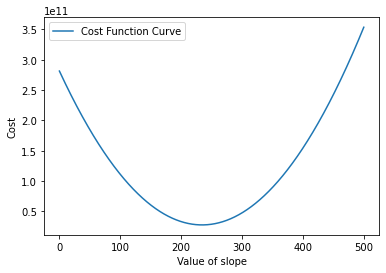

In [12]:
# plotting the cost values corresponding to every value of Beta
plt.plot(cost_table.slope, cost_table.costlist, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

# value of slope vs MSE graph

noe we can say approx 225 slope will give us the lowest error, but that is not correct. we also have to see wrt the intercept c.

taking both m, c into account we would get a 3d curve [check nb or 3dgraph.png]

In [13]:
# we are finding the error wrt intercept c now
def intercept_error(slope, intercept, sampledata):
    sale = [] # we will store the points predicted by the line with intercept c
    # for every pt in the sampledata.flat_area, we calculate the predicted point and store it in the list sale.
    for i in range(len(sampledata.flat_area)):
        tmp = sampledata.flat_area[i]*slope + intercept
        sale.append(tmp)
    MSE = mean_squared_error(sampledata.sale_price, sale) # sampledata.sale_price becomes the actual and the sale becomes the predicted point. difference of that is the residual.
    return MSE

In [15]:
intercept = [i for i in range(5000,50000)]
costlist = []
for i in intercept:
    cost = intercept_error(slope = 234, intercept = i, sampledata = sampledata)
    costlist.append(cost)


In [23]:
cost_table = pd.DataFrame({
    'intercept' : intercept,
    'costlist' : costlist
})
cost_table.tail()

,intercept,costlist
44995,49995,2.929862e+10
44996,49996,2.929870e+10
44997,49997,2.929878e+10
44998,49998,2.929886e+10
44999,49999,2.929894e+10


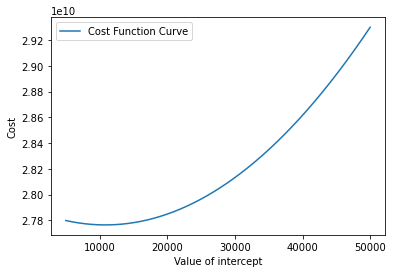

In [17]:
# plotting the cost values corresponding to every value of Beta
plt.plot(cost_table.intercept, cost_table.costlist, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

now we also know the value of c which will give us the minimum error

In [22]:
# value of c that will give minimum error
new_intercept = cost_table['intercept'][cost_table['costlist'] == cost_table['costlist'].min()].values
new_intercept[0]

10834

In [24]:
#we repeat the step where we find the correct value of m but this time we keep c = 10834
slope = [i/10 for i in range(0,5000)]
costlist = []
for i in slope:
    cost = slope_error( slope = i, intercept = 10834, sampledata = sampledata)
    costlist.append(cost)

In [25]:
# Arranging in DataFrame
cost_table = pd.DataFrame({
    'slope' : slope,
    'costlist' : costlist
})
cost_table.tail()

,slope,costlist
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


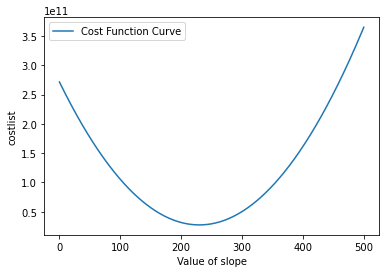

In [26]:
# plotting the cost values corresponding to every value of Beta
plt.plot(cost_table.slope, cost_table.costlist, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('costlist')
plt.legend()

In [27]:
#optimum value of slope is now found
new_slope = cost_table['slope'][cost_table['costlist'] == cost_table['costlist'].min()].values
new_slope[0]

229.7

In [28]:
# now finding optimum value of c using new value of m
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_error( slope = 229.7, intercept = i, sampledata = sampledata)
    Cost.append(cost)

In [29]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.head()

,intercept,Cost
0,5000,2.781305e+10
1,5001,2.781302e+10
2,5002,2.781299e+10
3,5003,2.781296e+10
4,5004,2.781293e+10


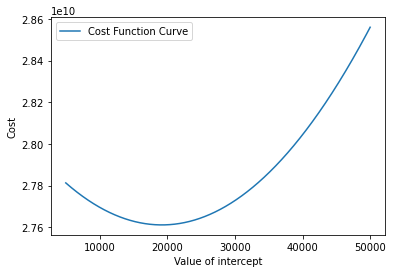

In [30]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [31]:
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_intercept[0]

19199

now we repeat this step a few times until we reach a consistent same value of c and m

in this case its c = 39428, m = 219

hence best fit line -> y = 219x + 39428

Now we have found the best fit line for our data

but this was only possible because we only had one variable. What if there were more?

# Gradient Descent
if there would be n variables,

y = c + m1x1 + m2x2 + .... mnxn

it will not be possible or very very very tedious for us to find the best fit line using the above method.

The gradient descent algorithm will help us to make this possible